# Hypotesetest for parede Temperaturdata

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

Jeg vil her gi et eksempel på en hypotesetest som tar utgangspunkt i
temperaturene i Bergen vi studerte i første uken av dette kurset.

Temperaturene ser ut til å ha økt i perioden vi har
målinger for. 

La oss gjette på at temperaturen har økt med mere enn en grad i
gjennomsnitt. 

Mere presist vil jeg gjøre utsagnet at på en tilfeldig kalenderdag
er temperaturen mere enn en grad høyere
enn den var på den samme kalenderdagen i året 40 år tidligere.

Jeg vil bruke de daglige temperaturmålingene i de siste 3653
dagene (de siste ti årene) og de 3653 dagene som var 40 år tidligere
for å teste denne hypotesen.

For $i = 1, \dots, 3653$ la $y_i$ være temperaturen for for $10$ år minus $i$ dager siden
minus temperaturen for $i$ dager og $40$ år siden. 

Mitt gjett er at
tallene $y_i$ er trukket fra en sannsynlighetsfordeling med gjennomsnitt $\mu$ og at
$\mu > \mu_0$ for $\mu_0 = 1 \ C^{\circ}$.

Jeg forventer at gjennomsnittet $E(y)$ av tallene $y_i$ er nær $\mu$, men jeg vil gjerne vite hvor stort det skal være for at jeg kan være rimelig sikker på at $\mu > \mu_0 = 1 \ C^{\circ}$.

**Antatt gjennomsnittsverdi** $\mu_0 = 1 \ C^{\circ}$

**Nullhypotese ($H_0)$:** $\mu = \mu_0$.

**Alternativ hypotese ($H_1$):** $\mu > \mu_0$.

Vi laster inn temperaturdata og beregner forskjellen mellem temperatur på hver kalenderdag og kalenderdagen 40 år tidliger for alle dager 10 år tilbake i tid

In [2]:
# Her importeres Point og Daily funksjonalitetene fra meteostat modulen.
# Hvis meteostat ikke allerede er installert blir den installert.
try:
  import meteostat
except:
  !pip install meteostat
  import meteostat

In [3]:
# Her importeres modulen pandas som pd sammen med numpy og matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t



In [4]:
# Her importeres funksjonaliteten datetime fra modulen datetime.
# Datetime gir oss en bekvem måte å jobbe med tidsdate på.

from datetime import datetime, timedelta

In [5]:
# Sett tidsperioden vi vil hente data fra
# Data for fremtiden kan ikke lastes inn, så når vi ber om å laste inn data får vi data helt opp til i dag.

start = datetime(1973, 1, 1)
end = datetime.today()

In [6]:
# Vi angir GPS koordinatene til Bergen
# Google maps gir oss koordinatene under. Høyden gjetter jeg meg til.

bergen = meteostat.Point(60.38526, 5.328060, 10)

In [7]:
# Vi laster ned daglige målinger for den angitte tidsperioden

data = meteostat.Daily(bergen, start, end)
data = data.fetch()


In [8]:
# setter endedato til å være siste dag vi har data for
end = data.index[-1]

In [9]:
# Vi setter gårdsdagens temperatur inn på dagene der temperatur mangler:
data['tavg_ffill'] = data['tavg'].ffill()

In [10]:
# Beregner forskjellen y mellem temperatur på hver kalenderdag og kalenderdagen 40 år tidliger for alle dager 10 år tilbake i tid

antall_år_sammenligne = 10
y1 = data.loc[end - timedelta(days=int(365.24 * antall_år_sammenligne)): end]['tavg_ffill'].values 
y2 = data.loc[end - timedelta(days=(365.2425 * antall_år_sammenligne)) - timedelta(days=int(365.2425 * 40)): end - timedelta(days=int(365.2425 * 40))]['tavg_ffill'].values
y = y1 - y2



In [11]:
# Lager pandas dataframe med temperaturdifferanser. 
# Dette for å ha funksjonaliteten til pandas tilgjengelig.

data2 = pd.DataFrame(y, columns=['temperaturdifferanse'], index=data.loc[end - timedelta(days=int(365.24 * antall_år_sammenligne)): end].index)

<Axes: xlabel='time'>

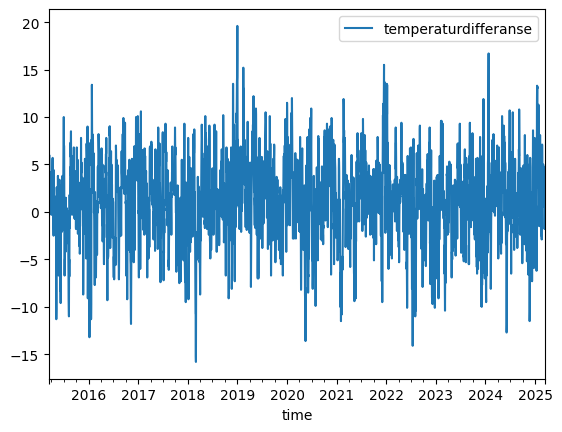

In [12]:
data2.plot(y=['temperaturdifferanse'])

## Normalfordeling

I mange situasjoner observerer vi noe som varierer av en sammensatt grunn. 

En typisk egenskap ved observasjoner som varierer av samensatte årsaker er at de ofte får en **normalfordeling**. 

Med mindre vi har spesiell grunn til å tro noe annet, så regner vi med at
observasjonene våre varier med en tilnærmet normalfordeling. 

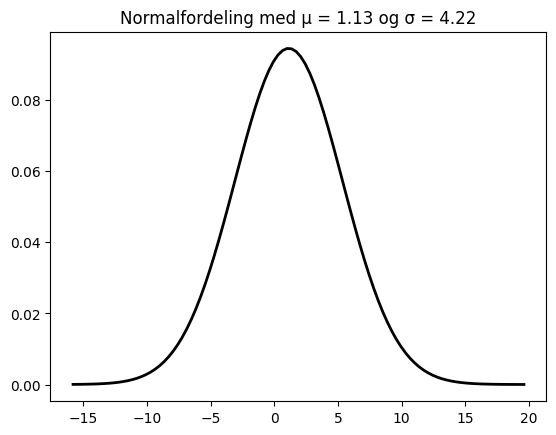

In [13]:
# Plotter normalfordeling med samme gjennomsnitt of standardavvik som observasjonene våre

xmin = np.min(y)
xmax = np.max(y)
mu, std = scipy.stats.norm.fit(data2['temperaturdifferanse'])
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Normalfordeling med μ = {:.2f} og σ = {:.2f}".format(mu, std)
plt.title(title);

## Kriterier for hypotesetest

For å teste hypotesen om temperaturforskjeller vil jeg bruke en $t$-test. Jeg har ett
utvalg av temperaturforskjeller $y_1, \dots, y_{3653}$, og nullhypotesen
er at disse tallene er trukket fra en normalfordeling med gjennomsnitt $1 \ C^{\circ}$.
Den alternative hypotesen er at tallene er trukket fra en normalfordeling med gjennomsnitt 
mindre enn $1 \ C^{\circ}$.

En forutsetning for å kunne bruke en $t$-test er at observasjonene er
normalfordelte. Jeg vet ikke på forhånd om temperaturforskjellene er normalfordelte,
men jeg kan danne meg en formening om dette ved å se på et histogram. 
Jeg kan finne normalfordelingskurven som passer best til
mitt data og sammenligne de to.

Hvis det ser bra ut kan jeg fortsette. Ellers må jeg finne en annen
metode eller en annen hypotese.

**Sjekker på data:**

Plotter først et histogram av data. 

(Teller hvor mange datapunkter i hvert delintervall i en oppdeling av intervallet av observerte verdier.)

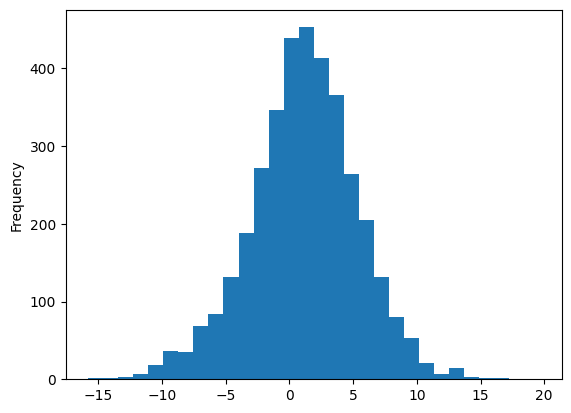

In [14]:
# Plotter histogram av temperaturdifferanser. 
data2['temperaturdifferanse'].plot.hist(bins=30)
xmin, xmax = plt.xlim()

Plotter deretter normalfordelinge med samme gjennomsnitt $E(y)$ og spredning $\sigma(y)$ som data opp på histogrammet for data.

Formlene for $E(y)$ og $\sigma(y)$ er

$$E(y) = \frac{y_1 + \dots + y_{3053}}{3053}$$

$$\sigma(y) = \sqrt{E(y^2) - E(y)^2}$$

der

$$E(y^2) = \frac{y_1^2 + \dots + y^2_{3053}}{3053}$$

Jeg kan visuellt avgjøre om data ser ut som om data er normalfordelt. Her under ser data normalfordelt ut.

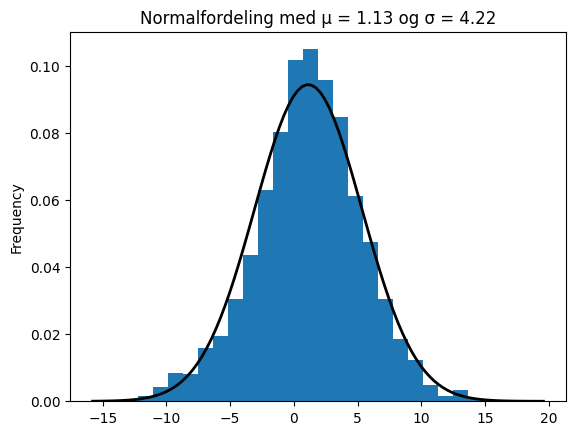

In [15]:
mu, std = scipy.stats.norm.fit(data2['temperaturdifferanse'])
data2['temperaturdifferanse'].plot(kind='hist', bins=30, density=True)
range = np.arange(-10, 10, 0.01)
# plt.plot(range, norm.pdf(range,0,4))
xmin = np.min(y)
xmax = np.max(y)
#xmin, xmax = plt.xlim()
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Normalfordeling med μ = {:.2f} og σ = {:.2f}".format(mu, std)
plt.title(title);

Siden data ser normalfordelt ut kan jeg anta at gjennomsnittet $E(y)$ er trukket fra en $t$-fordeling med $n - 1 = 3052$ frihetsgrader.
Siden vi kjenner standardavvik eller gjennomsnitt for den underliggende normalfordelingen bruker vi gjennomsnitt og standardavvik til $y$ 
til beregning av $t$-verdi.

Formelen for $t$-verdien er
$$t\_\text{verdi} = \frac{E(y) - \mu_0}{\sigma(y)/\sqrt{n}}.$$ 

Formlene for $E(y)$ og $\sigma(y)$ er beskrevet ovenfor. 

Vi kan se på gjennomsnittet som en funksjon av $t$-verdien:

$$\mu = E(y) - t  (\sigma(y) / \sqrt{n}).$$

In [16]:
# gjennomsnitt og standardavvik
Ey, sigmay = np.mean(y), np.std(y)

In [17]:
t_verdi = (Ey - 1)/(sigmay / np.sqrt(len(y)))

In [18]:
t_verdi

np.float64(1.9090855371048205)

Teorien for normalfordelte observasjoner forutsier at $t$-verdien vi nettopp beregnet vil fordele seg etter en $t$-fordeling med $n-1$ frihetsgrader.

$t$-fordelingen er tilnærmet lik normalfordelingen med standardavvik $1$ og gjennomsnitt $0$ når antallet av frihetsgrader er stort.

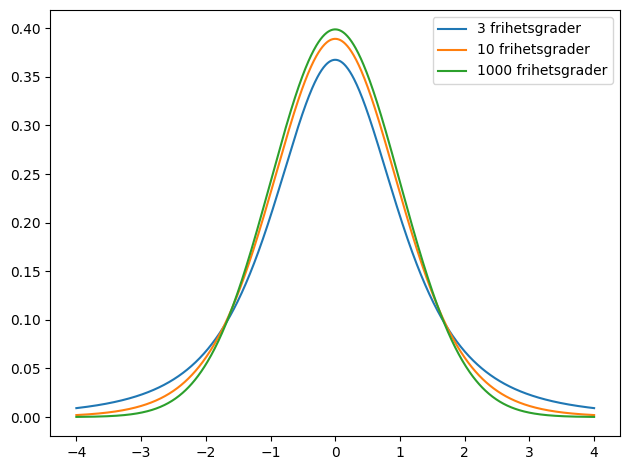

In [19]:
# Antall frihetsgrader
dfs = [3, 10, 1000]

# Sett opp verdier for x-aksen
x = np.linspace(-4, 4, 1000)

alpha = 0.05  # Signifikansnivå

for df in dfs:
    yy = scipy.stats.t.pdf(x, df)  # t-fordeling med 10 frihetsgrader
    plt.plot(x, yy, label=f'{df} frihetsgrader')

# y = norm.pdf(x)
# plt.plot(x, y + 0.002)

plt.legend()
plt.tight_layout()
plt.show()


## Overgang fra t-verdi til sannsynlighet, eller p-verdi

Vi antar at temperaturen $y$ er fordelt etter en normalfordeling med gjennomsnittsverdi $\mu$ og standardavvik $\sigma$.

Gitt en $t$-verdien $t\_\text{verdi}$ og antallet av frihetsgrader kan vi finne sannsynligheten for at $\mu \le \mu_0$ og sannsynligheten for at $\mu > \mu_0$.

Hvis sannsynligheten for nullhypotesen $H_0$: $\mu \le \mu_0$ er veldig liten velger vi å forkaste nullhypotesen. 

Vi må på forhånd bestemme oss for hva vi mener med veldig liten. 

Et typisk valg er "mindre en 5%".

I vårt tilfelle er $t\_\text{verdi}$ og antall frihetsgrader gitt ved:

In [20]:
# t-verdi og antall frihetsgrader

antall_frihetsgrader = len(y) - 1
float(t_verdi), antall_frihetsgrader

(1.9090855371048205, 3652)

Arealet til det røde området på figuren under er sannsynligheten for at nullhypotesen er sann.

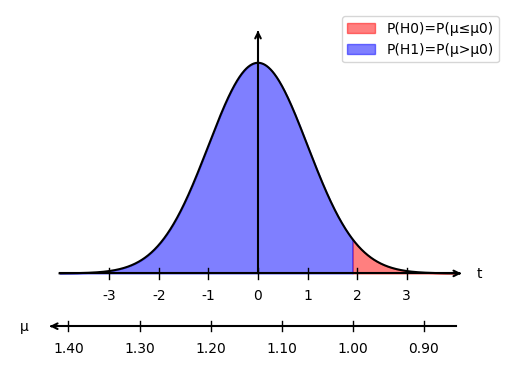

In [21]:
# @title plot
import matplotlib.pyplot as plt
import numpy as np

# Define the function
x = np.linspace(-4, 4, 1000)
yy = scipy.stats.t.pdf(x, antall_frihetsgrader)  # t-fordeling med 10 frihetsgrader
t_crit = t_verdi

def t_av_mu(m):
    return (Ey - m)/(sigmay/np.sqrt(len(y)))
# def mu_av_t(t):
#     return Ey - t*(sigmay/np.sqrt(len(y)))
    
ax = plt.gca()


plt.plot(x, yy, color='black')
plt.fill_between(x, yy, where=(x > t_crit), color='red', alpha=0.5, label=r'P(H0)=P(μ≤μ0)')
plt.fill_between(x, yy, where=(x < t_crit), color='blue', alpha=0.5, label=r'P(H1)=P(μ>μ0)')
# Remove default spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Set limits
ax.set_xlim(-5, 5)
ax.set_ylim(-.2, .5)  # Ensure axes are visible

# Draw the primary x-axis (for x) with an arrow
ax.plot([-4, 4], [0, 0], color="black", lw=1.5)  
ax.annotate("", xy=(4.1, 0), xytext=(4., 0),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(4.4, 0, r"t", verticalalignment="center")

# Draw the secondary x-axis (for -x) with an arrow
ax.plot([-4.1, 4], [-.1, -.1], color="black", lw=1.5)  
ax.annotate("", xy=(-4.2, -.1), xytext=(-4.1, -.1),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(-4.8, -.1, r"μ", verticalalignment="center")

# Draw the y-axis with an arrow
ax.plot([0, 0], [0, .45], color="black", lw=1.5)  
ax.annotate("", xy=(0, .46), xytext=(0, .45),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
#ax.text(-0.3, .45, r"y", verticalalignment="center")

# Set x-ticks for t-axis
ticks = np.arange(-3, 4, 1)  # Tick positions

# Draw ticks for t-axis
for ti in ticks:
    ax.plot([ti, ti], [-.01, .01], color="black", lw=1)  # Small tick marks
    ax.text(ti, -.05, f"{ti}", fontsize=10, ha="center")  # Labels below ticks

# Set ticks for μ-axis
mu_verdier = np.arange(0.9, 1.5, .1)
muticks = [t_av_mu(mu) for mu in mu_verdier]
# muticks = [mu_av_t(t) for t in ticks]
# Draw ticks for secondary x-axis (-x)
for t, mu in zip(muticks, mu_verdier):
    ax.plot([t, t], [-.11, -.09], color="black", lw=1)  # Small tick marks
    ax.text(t, -.15, f"{mu:.2f}", fontsize=10, ha="center")  # Labels below ticks

# Remove y-ticks
ax.set_yticks([])
ax.set_xticks([])
plt.legend()
plt.show()


Nullhypotesen $\mu = \mu_0$ (eller $\mu \le \mu_0$) forkastes når sannsynligheten for alternativ hypotese $H_1$: $\mu > \mu_0$ er minst $95 \%$. Det er det samme som at sannsynligheten for $H_0$ er høyst $5 \%$.

I gitt fall sier vi at nullhypotesen forkastes med $5 \%$ signifikansnivå.

Som for normalfordelingen kan scipy hjelpe oss med å finne dette arealet:

In [22]:
# p-verdi
1 - scipy.stats.t.cdf(t_verdi, df=antall_frihetsgrader)

np.float64(0.028164677144488892)

In [23]:
# Siden t-funksjonen er symmetrisk fås samme verdi ved å integrere frem til -t_verdi
p_verdi = scipy.stats.t.cdf(-t_verdi, antall_frihetsgrader)

In [24]:
#vi får p-verdien

float(100 * p_verdi)

2.81646771444889

Vi kan altså forkaste nullhypotesen som sier at temperaturen i Bergen ikke er steget med mere enn en grad celsius med et signifikansnivå på 5%.

**Konklusjon:**

Temperaturen i Bergen er steget med mere enn en grad per 40 år.

I en forelesning som kommer ganske snart vil vi se om vi kan komme til samme konklusjon ved å gjøre en t-test på stignigstallet i regresjonslinjen vi fant for disse temperaturdata.

[To utvalgs hypotesetest](to_utvalgs_t_test.ipynb)